In [23]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [24]:
tmall_df = pd.read_csv(r"C:\Users\Lin\Desktop\file\tmall_order.csv", encoding='gbk')
tmall_df.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020/2/21 0:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020/2/20 23:59,2020/2/21 0:00,0.0
2,3,37.0,0.0,安徽省,2020/2/20 23:59,NaN,0.0
3,4,157.0,157.0,湖南省,2020/2/20 23:58,2020/2/20 23:58,0.0
4,5,64.8,0.0,江苏省,2020/2/20 23:57,2020/2/20 23:57,64.8


In [25]:
tmall_df.columns

Index(['订单编号', '总金额', '买家实际支付金额', '收货地址 ', '订单创建时间', '订单付款时间 ', '退款金额'], dtype='object')

In [26]:
tmall_df = tmall_df.rename(columns={'收货地址 ': "收货地址", "订单付款时间 ": "订单付款时间"})

In [27]:
#默认统计数值型变量
tmall_df.describe()

,订单编号,总金额,买家实际支付金额,退款金额
count,28010.000000,28010.000000,28010.000000,28010.000000
mean,14005.500000,106.953253,67.921712,20.433271
std,8085.934856,1136.587094,151.493434,71.501963
min,1.000000,1.000000,0.000000,0.000000
25%,7003.250000,38.000000,0.000000,0.000000
50%,14005.500000,75.000000,45.000000,0.000000
75%,21007.750000,119.000000,101.000000,0.000000
max,28010.000000,188320.000000,16065.000000,3800.000000


In [28]:
#统计离散型变量
tmall_df.describe(include=[np.object])

,收货地址,订单创建时间,订单付款时间
count,28010,28010,24087
unique,31,13151,12273
top,上海,2020/2/19 15:34,2020/2/24 18:42
freq,3353,20,14


In [38]:
#总订单数
order_df = tmall_df['订单编号'].count()
order_df

28010

In [39]:
#付过款的订单数
cums_payed_df = tmall_df[tmall_df['订单付款时间'].notnull()]
cums_payed_df.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
1,2,21.0,21.0,内蒙古自治区,2020/2/20 23:59,2020/2/21 0:00,0.0
3,4,157.0,157.0,湖南省,2020/2/20 23:58,2020/2/20 23:58,0.0
4,5,64.8,0.0,江苏省,2020/2/20 23:57,2020/2/20 23:57,64.8
5,6,327.7,148.9,浙江省,2020/2/20 23:56,2020/2/20 23:56,178.8
6,7,357.0,357.0,天津,2020/2/20 23:56,2020/2/20 23:56,0.0


In [40]:
cums_payed = cums_payed_df['订单编号'].count()
cums_payed

24087

In [41]:
#实际支付金额不为0的订单数
order_payed_all = tmall_df[tmall_df['买家实际支付金额']!= 0]
order_payed_all.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
1,2,21.0,21.0,内蒙古自治区,2020/2/20 23:59,2020/2/21 0:00,0.0
3,4,157.0,157.0,湖南省,2020/2/20 23:58,2020/2/20 23:58,0.0
5,6,327.7,148.9,浙江省,2020/2/20 23:56,2020/2/20 23:56,178.8
6,7,357.0,357.0,天津,2020/2/20 23:56,2020/2/20 23:56,0.0
7,8,53.0,53.0,浙江省,2020/2/20 23:56,2020/2/20 23:56,0.0


In [42]:
order_payed = order_payed_all['订单编号'].count()
order_payed

18955

In [43]:
#商家全额收款订单数
order_all = cums_payed_df[cums_payed_df['退款金额']== 0]
order_all.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
1,2,21.0,21.0,内蒙古自治区,2020/2/20 23:59,2020/2/21 0:00,0.0
3,4,157.0,157.0,湖南省,2020/2/20 23:58,2020/2/20 23:58,0.0
6,7,357.0,357.0,天津,2020/2/20 23:56,2020/2/20 23:56,0.0
7,8,53.0,53.0,浙江省,2020/2/20 23:56,2020/2/20 23:56,0.0
9,10,421.0,421.0,北京,2020/2/20 23:54,2020/2/20 23:54,0.0


In [44]:
order_payed_all = order_all['订单编号'].count()
order_payed_all

18441

In [46]:
order_dict = {}

order_dict['总订单数'] = order_df
order_dict['付过款订单数'] = cums_payed
order_dict['实际支付金额不为0的订单数'] = order_payed
order_dict['商家全额收款订单数'] = order_payed_all

In [47]:
order_dict

{'总订单数': 28010, '付过款订单数': 24087, '实际支付金额不为0的订单数': 18955, '商家全额收款订单数': 18441}

# 计算转化率

In [48]:
df_conv = pd.Series(order_dict, name='订单数').to_frame()
df_conv

,订单数
总订单数,28010
付过款订单数,24087
实际支付金额不为0的订单数,18955
商家全额收款订单数,18441


In [49]:
total_convs = df_conv['订单数'] / order_df * 100
total_convs

总订单数             100.000000
付过款订单数            85.994288
实际支付金额不为0的订单数     67.672260
商家全额收款订单数         65.837201
Name: 订单数, dtype: float64

In [50]:
df_conv['总体转化率'] = total_convs
df_conv

,订单数,总体转化率
总订单数,28010,100.000000
付过款订单数,24087,85.994288
实际支付金额不为0的订单数,18955,67.672260
商家全额收款订单数,18441,65.837201


# 单一环节转化率

In [51]:
sigle_convs = df_conv['订单数'].shift()
sigle_convs

总订单数                 NaN
付过款订单数           28010.0
实际支付金额不为0的订单数    24087.0
商家全额收款订单数        18955.0
Name: 订单数, dtype: float64

In [53]:
sigle_convs[0] = order_df
sigle_convs

总订单数             28010.0
付过款订单数           28010.0
实际支付金额不为0的订单数    24087.0
商家全额收款订单数        18955.0
Name: 订单数, dtype: float64

In [54]:
df_conv['单一环节转化率'] = df_conv['订单数'] / sigle_convs
df_conv

,订单数,总体转化率,单一环节转化率
总订单数,28010,100.000000,1.000000
付过款订单数,24087,85.994288,0.859943
实际支付金额不为0的订单数,18955,67.672260,0.786939
商家全额收款订单数,18441,65.837201,0.972883


# 绘制订单量趋势

In [55]:
df_payed_order = cums_payed_df.copy()
df_payed_order['时间'] = df_payed_order['订单创建时间'].astype('datetime64[D]')
df_payed_order.tail()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,时间
28002,28003,77.0,77.0,重庆,2020/2/27 0:02,2020/2/27 0:03,0.0,2020-02-27
28003,28004,157.0,157.0,山东省,2020/2/27 0:01,2020/2/27 0:01,0.0,2020-02-27
28005,28006,37.0,37.0,四川省,2020/2/27 0:01,2020/2/27 0:01,0.0,2020-02-27
28008,28009,37.0,37.0,辽宁省,2020/2/27 0:00,2020/2/27 0:00,0.0,2020-02-27
28009,28010,37.0,37.0,广东省,2020/2/27 0:00,2020/2/27 0:00,0.0,2020-02-27


In [56]:
order_df = df_payed_order[['订单编号', '时间']]
order_df.head()

,订单编号,时间
1,2,2020-02-20
3,4,2020-02-20
4,5,2020-02-20
5,6,2020-02-20
6,7,2020-02-20


In [57]:
order_count_df = order_df.groupby("时间")['时间'].agg({'订单数': 'count'}).sort_index()
order_count_df.head()

,订单数
时间,
2020-02-01,163
2020-02-02,199
2020-02-03,239
2020-02-04,417
2020-02-05,333


In [58]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

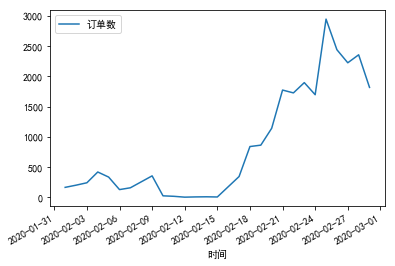

In [59]:
order_count_df.plot()

# 绘制销量区域分布

In [60]:
addr_payed_order =  tmall_df.copy()
addr_payed_order.head()

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020/2/21 0:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020/2/20 23:59,2020/2/21 0:00,0.0
2,3,37.0,0.0,安徽省,2020/2/20 23:59,NaN,0.0
3,4,157.0,157.0,湖南省,2020/2/20 23:58,2020/2/20 23:58,0.0
4,5,64.8,0.0,江苏省,2020/2/20 23:57,2020/2/20 23:57,64.8


In [61]:
order_count = addr_payed_order.groupby("收货地址")['收货地址'].agg({'订单数': 'count'}).sort_values(by='订单数', ascending=False)
order_count.head()

,订单数
收货地址,
上海,3353
广东省,2463
江苏省,2126
浙江省,2061
北京,2054


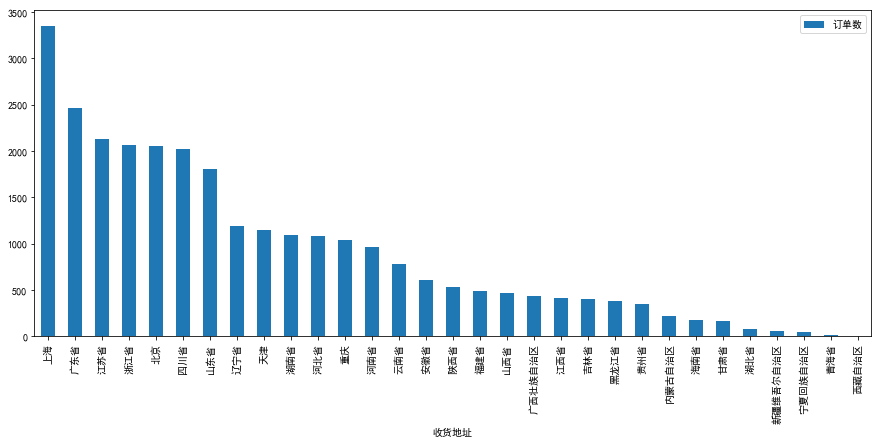

In [62]:
order_count.plot(kind='bar', figsize=(15,6))